In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score    

We will use the `SVC` function from `sklearn.svm` module for **C-Support Vector Classification**. Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for details. 


- ``c = 1`` default 
- ``degree = 3`` default (ignored in non-poly kernels)
- ``kernel = 'rbf'`` default, other options include {â€˜linearâ€™, â€˜polyâ€™, â€˜rbfâ€™, â€˜sigmoidâ€™, â€˜precomputedâ€™}.  To learn more about the kernel functions, check [this link](https://scikit-learn.org/stable/modules/svm.html#kernel-functions). 


# 1. Linear SVC

To build a linear SVM model for classification, we need to set `kernel` parameter as follows.  

```python
>>>SVC(kernel='linear')  
```

Alternatively, use ``LinearSVC``  function (check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) for details) for linear tasks.   

- ``LinearSVC`` function use ``'squared_hinge'`` as the loss function by default, while ``SVC`` function use ``'hinge'`` as the loss function. 

- ``LinearSVC`` function is implemented with the ``liblinear`` optimization method (for linear tasks only), while  `SVC` use  ``libsvm`` optimization method for both linear and non-linear classification tasks. Therefore,  `LinearSVC` function has more flexibility in the choice of penalties (default `'L2'`) and loss functions (default `squared_hinge`) and **scale better to larger datsets**.  

## 1.1 Data Preparation 

In [2]:
df1 = pd.read_csv('svm_data1.csv')   # simulated data (a balanced dataset)

df1.head()

,x1,x2,y
0,-1.879361,-3.260726,-1
1,10.550930,4.521751,1
2,7.493114,12.985845,1
3,4.785842,-0.035585,-1
4,10.988523,8.201115,1


**Visualize Data** 

Use `matplotlib.pyplot.scatter` function to create scatter plots. Check [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for details.

- The `color` or `c` parameter takes a single color (to set same color for all instances) or a list of [colors](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def) (to set different colors for instances). 

- To map colors to a numerical array (e.g., the target variable **y**), we should only use `c` parameter (not `color`).  Colors are automatically assigned  according to the numerical values (here 1 as gold, -1 as purple). To change the default setting, you may adjust the `cmap` together with the `c` parameter. 

In case with non-numeric target **y**,  create a list of colors according to the target values and pass to the `c`/`color` parameter as follows: 

```python
>>> colors = df1['y'].replace({1: 'gold', -1: 'lightblue'})
>>> plt.scatter(x = df1['x1'], y = df1['x2'], c = colors) 
```



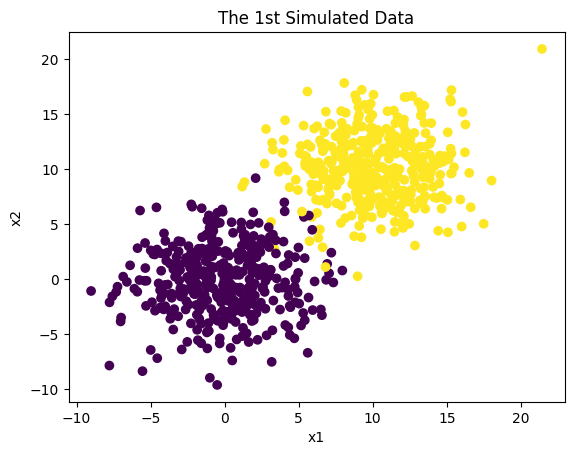

In [3]:
plt.scatter(x = df1['x1'], y = df1['x2'], c = df1['y'])     # same as plt.scatter(data = df1, x = 'x1', y = 'x2', c = 'y') 
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('The 1st Simulated Data')
plt.show()

**Split and Scale Data**

Regularized models requires scale features for faster convergence.

In [4]:
X = df1[['x1','x2']]

y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)   # test_size = 0.25 (default)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(600, 2)

(200, 2)

(600,)

(200,)

In [5]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)   

X_test_scaled  = scaler.transform(X_test)

display(X_train_scaled.shape, X_test_scaled.shape)   # 2d arrays without name

(600, 2)

(200, 2)

##  1.2  Train Two Linear SVC with Different C

``C``: inversely proportional to the regularization strength of the coefficients. Must be strictly positive.

- Large ``C``  ->  Less tolerant of hinge loss  -> More complicated model (bigger coefficients, better fit) with less SVs. 
- Small ``C``  ->  More tolerant of hinge loss -> Simpler model (smaller coefficients, worse fit) with more SVs.

### 1.2(a) Train svm1 with C  =  0.01

By default, the `SVC` function doesn't estimate class probability due to the default setting `probabilty = False`.   

In [6]:
svm1 = SVC(kernel='linear', C = 0.01)    

svm1.fit(X_train_scaled, y_train)

display(svm1.intercept_, svm1.coef_)  

array([-0.41032726])

array([[0.94666887, 0.964465  ]])

**Check Confident Scores: i.e., f(x).**

In [7]:
svm1.decision_function(X_train_scaled)    # f(x) values

array([ 0.90711841,  0.67743103,  0.70973603,  0.29006027,  0.97084993,
       -0.03297953,  1.00514028, -0.18469689, -0.01647611,  0.85831793,
        0.07975913,  0.26264403,  0.88064983,  0.18952672,  0.95493959,
        0.71898715,  0.12720058, -0.01820584,  0.41531444,  0.85806047,
       -0.15391712,  0.69277563,  0.530045  ,  0.80320108,  0.91640846,
        0.10362532,  0.08644025,  0.12343012,  0.13025854,  0.72421275,
        0.12035481,  0.6079848 ,  0.12107115,  0.93636958,  0.71047105,
        0.47106209,  0.66758097,  0.07880932,  0.72906617,  0.29700654,
        0.90562154,  0.27943686,  1.15275695,  0.7024978 ,  0.14257376,
        0.13896061,  0.03993366,  0.0901109 ,  0.19878422,  0.81322321,
        0.27455438,  0.60542961,  0.73603603,  0.76982277, -0.0904731 ,
        0.94526528,  0.79502737,  0.16351042,  0.21393986,  0.27135702,
        0.12308181,  0.69235522,  0.19268676,  0.78778104,  0.71400581,
        0.80468323,  0.87709285,  0.73203308,  0.04754721,  0.78

**Class Predictions**

In [8]:
svm1.predict(X_train_scaled)   

array([ 1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

**Notes on Class Probability Estimation**

If class probabilities are needed, set `SVC(probability = True, kernel = 'linear')` before model fitting, then use `predict_proba` method of the model to estimate class probabilities.  

Here is a brief summary of how SVC models estimate class probabilities.
- 1. Split training data into different folds of sub-train and validation.
- 2. For each fold, (1) train a SVC model on the sub-train fold and apply it on the validation fold to obtain confidence scores, then (2) fit a logistic regression model with confidence scores (from validation fold) as the feature and their true class labels as target.
- 3. Average the parameter values from each validation fold for a final logistic regression model.
- 4. When applying the `SVC` model for probability estimation: (1) apply the initial SVC model trained on the entire training set (i.e., the **svm1** here) to the data to obtain confidence scores and then (2) apply the final logistic regression model, obtained from cross-validation, on those confidence scores to obtain probabilities.  
  
Check the [documentation](https://scikit-learn.org/stable/modules/svm.html#scores-probabilities) for details.

**Which are Support Vectors?**

- Check the number of SVs for each class with `n_support_` attribute.
- Check the feature values of each SV with the `support_vectors_` attribute.

In [9]:
display(svm1.n_support_, svm1.support_vectors_)   

array([290, 290], dtype=int32)

array([[0.38310551, 0.35015627],
       [0.17659031, 0.21791893],
       [0.13232162, 0.1040635 ],
       ...,
       [0.40350346, 0.70038267],
       [0.67334517, 0.64624049],
       [0.81887643, 0.55185119]])

Visualize the training data and Support Vectors for **svm1**.

- visualize the training data in different color based on their target value.
- visualize the support vector as red crosses.

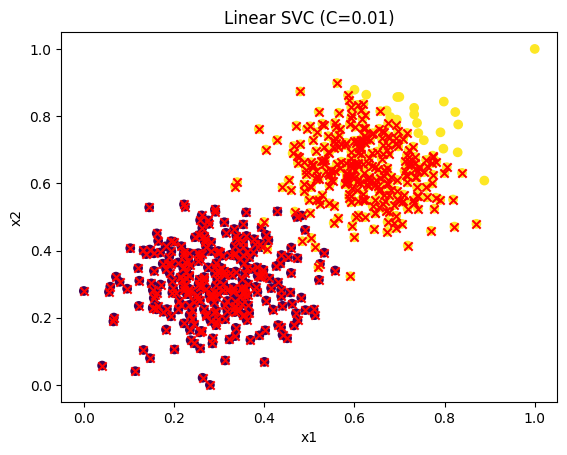

In [10]:
SV1 = svm1.support_vectors_   # SV features 
C1 = svm1.get_params()['C']   # C value 

plt.scatter(x = X_train_scaled[:,0], y = X_train_scaled[:,1], c = y_train)      # plot data (colors auto-assigned)
plt.scatter(x = SV1[:, 0], y = SV1[:, 1],  c = 'red',  marker='x')              # plot SVs as red crosses 
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Linear SVC (C={})".format(C1))       #  format string     
plt.show()

### 1.2(b) Train svm2 with C = 100

- Less tolerant of hinge loss, resulting in a more complicated model (larger coefficients -> narrower margins and less SVs). 

In [11]:
svm2 = SVC(kernel='linear', C = 100) 

svm2.fit(X_train_scaled, y_train)

display(svm2.intercept_, svm2.coef_, svm2.n_support_)    # a more complicated model 

array([-10.39464843])

array([[10.02515291, 12.24914943]])

array([12, 12], dtype=int32)

Visualize the training data and support vectors for **svm2**.

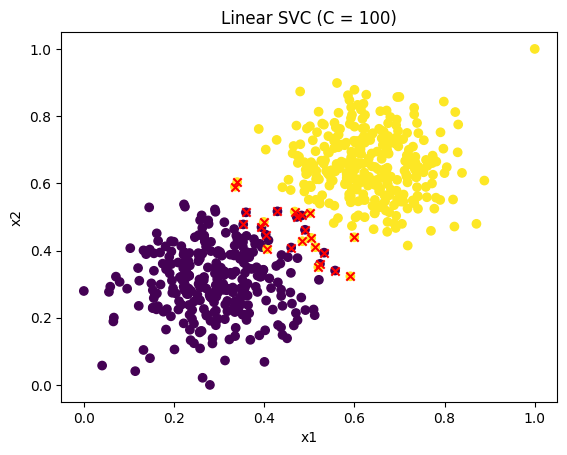

In [12]:
SV2 = svm2.support_vectors_   # SV features
C2 = svm2.get_params()['C']   # C value

plt.scatter(x = X_train_scaled[:,0], y = X_train_scaled[:,1], c = y_train)
plt.scatter(x = SV2[:, 0], y = SV2[:, 1], c = 'red', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Linear SVC (C = {})".format(C2))
plt.show()

## 1.3 Holdout Testing  

<font color=red>***Exercise 1: Your Codes Here***</font>  

Is **svm2** overfitting? Please compare their train and test performance respectively. 


## 1.4 Cross Validation 

### 1.4(a) Splitting Strategies

Both the two splitting strategies return the training and test indices in each split (interation).

**K-Fold**

`K-Fold` CV Splitter (check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)) splits data into `k` consecutive folds (no shuffling by default), and iterate over each fold: with one fold used for testing while the remaining k-1 folds for model training.

- Note in each split, the class distribution are different. 

In [13]:
from sklearn.model_selection import KFold

splitter1 = KFold(n_splits = 5)                                      # no shuffling by default
#splitter1 = KFold(n_splits = 5, shuffle = True, random_state = 1)   # to shuffle data first

for train_ind, test_ind in splitter1.split(X):    # X - features(800,2)  
    train_no = len(train_ind)                     # no. of training indices       
    test_no =  len(test_ind)                      # no. of test indices  
    train_pos = sum(y[train_ind]==1)              # no. of pos instances in training  
    test_pos = sum(y[test_ind]==1)                # no. of pos instances in test   
    print('No. of Instances: Train {}, Test {}'.format(train_no, test_no))                 # display no of instances in train/test
    print('%Pos: Train {:.2%}, Test {:.2%}'.format(train_pos/train_no, test_pos/test_no))  # display %pos in train/test
    print('-------------------') 

No. of Instances: Train 640, Test 160
%Pos: Train 49.84%, Test 52.50%
-------------------
No. of Instances: Train 640, Test 160
%Pos: Train 50.00%, Test 51.88%
-------------------
No. of Instances: Train 640, Test 160
%Pos: Train 51.41%, Test 46.25%
-------------------
No. of Instances: Train 640, Test 160
%Pos: Train 50.00%, Test 51.88%
-------------------
No. of Instances: Train 640, Test 160
%Pos: Train 50.62%, Test 49.38%
-------------------



**Stratified KFold** 

The ``StratifiedKFold`` CV Splitter (check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)) is a variation of ``KFold``. It returns stratified folds that **preserves class distribution** in the whole dataset.  

- Note in each split, the class distribution are the same/similiar to the class distribution in the whole dataset (i.e. 50.37%).

In [14]:
from sklearn.model_selection import StratifiedKFold

splitter2 = StratifiedKFold(n_splits = 5)                                        # no shuffling by default
#splitter2 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)     # to shuffle data first

for train_ind, test_ind in splitter2.split(X, y):         # provide both X (features) and y (target)
    train_no = len(train_ind)
    test_no =  len(test_ind)
    train_pos = sum(y[train_ind]==1)
    test_pos = sum(y[test_ind]==1)
    print('No. of Instances: Train {}, Test {}'.format(train_no, test_no))      
    print('%Pos: Train {:.2%}, Test {:.2%}'.format(train_pos/train_no, test_pos/test_no))  
    print('-----------------')

No. of Instances: Train 640, Test 160
%Pos: Train 50.47%, Test 50.00%
-----------------
No. of Instances: Train 640, Test 160
%Pos: Train 50.47%, Test 50.00%
-----------------
No. of Instances: Train 640, Test 160
%Pos: Train 50.31%, Test 50.62%
-----------------
No. of Instances: Train 640, Test 160
%Pos: Train 50.31%, Test 50.62%
-----------------
No. of Instances: Train 640, Test 160
%Pos: Train 50.31%, Test 50.62%
-----------------


### 1.4(b) Cross-validation for Model Evaluation


Ideally, in each split (iteration), we should train and apply the scaler on training features before model training, then apply the scaler to transform test features before model evaluation. That means,  in each split, we should use a **pipeline** to chain the **scaler** and **model** together.  Check [here](https://scikit-learn.org/1.5/modules/compose.html#pipeline) if you are interested in Pipeline.

- For simplicity, here we use the unscaled data directly for cross-validation.   

**Model Comparison with Cross-Validation**

The ``cross_val_score`` function from `sklearn.model_selection` module requires the following parameters.   Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)  for details.


- ``estimator``: the model
- ``X``: feature values
- ``y``: target values
- ``scoring``: model evaluation metrics (default = None, i.e., `accuracy` for classification models, `R2` for regression models)
- ``cv``: plitting strategy (default = None). You may pass an `integer` (which use `StratifiedKFold` for classification,  `KFold` for other models) or a `CV splitter`.

    By default ``shuffle`` = False, to enable data shuffing, you may pass a customized splitter as follows. 
 
```python
splitter = StratifiedKFold(n_splits = 5, shuffle=True, random_state= 1)          # shuffle data first
svm1_cv = cross_val_score(estimator = svm1, X = X_scaled, y = y, cv = splitter)  # pass a splitter to `cv` 
```

 

In [15]:
# 5-fold cross-validation for svm1

from sklearn.model_selection import cross_val_score

svm1 = SVC(kernel='linear', C = 0.01)           # define a model 

svm1_cv = cross_val_score(estimator = svm1,    # the model
                          X = X,               # features (entire dataset)
                          y = y,               # target (entire dataset)
                          cv = 5)              # 5-fold cv without shuffling

display(svm1_cv, svm1_cv.mean(), svm1_cv.std())   # return test scores 

array([0.96875, 0.98125, 0.9875 , 0.99375, 0.98125])

np.float64(0.9824999999999999)

np.float64(0.008291561975888513)

<font color=red>***Exercise 2: Your Codes Here***</font>  


Please also conduct 5-fold cross validation for **svm2** (C = 100).  Which model is better? 


In [7]:
svm2_cv_model = SVC(kernel='linear', C=100)
svm2_cv_scores = cross_val_score(estimator=svm2_cv_model, X=X, y=y, cv=5)
print('svm2 5-fold CV accuracy scores:', np.round(svm2_cv_scores, 4))
print('Mean accuracy: {:.2%}'.format(svm2_cv_scores.mean()))
print('Std dev: {:.2%}'.format(svm2_cv_scores.std()))


NameError: name 'SVC' is not defined

## 1.5 GridSearchCV: Find the Best C Value

The `GridSearchCV` function from `sklearn.model_selection` search over specified parameter values for a model. Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for more details. 

- ``refit``= ``True`` (default): refit an model on the entire training set using the best parameter found in cross validation. 

- By default, only the validation scores are returned.  If training scores for each split are needed, set ``return_train_score`` = ``True`` (default ``False``). 

How many models have been trained in this process?  ``No.of C values`` * ``cv`` + 1

In [16]:
from sklearn.model_selection import GridSearchCV

svm_linear = SVC(kernel='linear')  

range1 = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 5, 10, 100, 1000, 2000]}    # 10 C values 

grid1 = GridSearchCV(estimator = svm_linear,      # the model 
                     param_grid = range1,         # C values to compare 
                     cv = 5)                      # StratifiedKFold without shuffling (default)

grid1.fit(X_train_scaled, y_train)               # search over all C values on training data  

print("Best Params: ", grid1.best_params_)                 # best C value (which returns the highest mean cv score)   
print("Best cv score: {:.2%}".format(grid1.best_score_))   # average validation score of the best C value

Best Params:  {'C': 0.1}
Best cv score: 98.17%


The `cv_results_` attribute of the gridsearch object returns the results in a dictionary.   

In [17]:
pd.DataFrame(grid1.cv_results_)      # convert as dataframe for better readability

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018844,0.001976,0.006827,0.001052,0.00001,{'C': 1e-05},0.516667,0.516667,0.516667,0.516667,0.516667,0.516667,0.000000,8
1,0.019389,0.001132,0.006741,0.000508,0.00010,{'C': 0.0001},0.516667,0.516667,0.516667,0.516667,0.516667,0.516667,0.000000,8
2,0.018466,0.001330,0.006315,0.000417,0.00100,{'C': 0.001},0.516667,0.516667,0.516667,0.516667,0.516667,0.516667,0.000000,8
3,0.016969,0.001268,0.006812,0.001079,0.01000,{'C': 0.01},0.516667,0.525000,0.516667,0.516667,0.516667,0.518333,0.003333,7
4,0.012894,0.001285,0.005435,0.000135,0.10000,{'C': 0.1},0.983333,0.991667,0.975000,0.983333,0.975000,0.981667,0.006236,1
5,0.005349,0.000727,0.003517,0.000915,5.00000,{'C': 5},0.983333,0.983333,0.975000,0.975000,0.975000,0.978333,0.004082,6
6,0.004767,0.000588,0.002854,0.000416,10.00000,{'C': 10},0.983333,0.983333,0.983333,0.975000,0.975000,0.980000,0.004082,2
7,0.003700,0.000361,0.002723,0.000754,100.00000,{'C': 100},0.983333,0.983333,0.983333,0.975000,0.975000,0.980000,0.004082,2
8,0.005117,0.000488,0.002650,0.000532,1000.00000,{'C': 1000},0.983333,0.983333,0.983333,0.975000,0.975000,0.980000,0.004082,2
9,0.006059,0.001489,0.003040,0.000840,2000.00000,{'C': 2000},0.983333,0.983333,0.983333,0.975000,0.975000,0.980000,0.004082,2


**Check the Best Model**  

With the best ``C`` value found,  a new model was re-fitted on the entire train set (note by default ``refit``= ``True``).  

- We can check the coefficients, number of support vectors, or apply the model for prediction and evaluation.   

In [18]:
linear_best = grid1.best_estimator_       # get the best model refitted on the training set

#linear_best = SVC(kernel = 'linear', C = 0.1).fit(X_train_scaled, y_train)  # alternatively 

display(linear_best.intercept_,linear_best.coef_)

array([-2.84067188])

array([[3.05389855, 3.06979482]])

Let's also evaluate the best model on test data.

- The ``GridSearchCV`` object has ``predict`` and ``score`` methods, which use the best model refit on the entire training set for prediction and evaluation.

In [19]:
grid1.score(X_test_scaled, y_test)        # same as linear_best.score(X_test_scaled, y_test) 

0.99

# 2. Nonlinear SVC: Polynomial Kernel

To train a polynomial SVC,  change the `kernel` parameter as folows.  
 


```python
>>>SVC(kernel='poly')  
```


To control model complexity of a polynomial kernel, we adjust the parameter ``degree`` (int, default=``3``) as well.  

- Note that attributes such as ``coef_`` is only available when ``kernel = 'linear'``.

## 2.1 Data Preparation

In [20]:
df2 = pd.read_csv('svm_data2.csv')   

df2.shape   # a small simulated data with 200 instances

(200, 3)

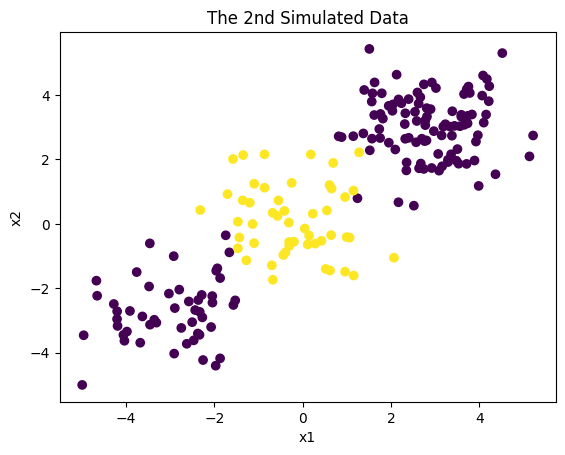

In [21]:
# visualization 

plt.scatter(x = df2['x1'], y = df2['x2'], c = df2['y'])   
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('The 2nd Simulated Data')
plt.show()

**Split and Scale Data**


In [22]:
X = df2[['x1','x2']]

y = df2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)   # testsize=0.25 by default

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 2)

(50, 2)

(150,)

(50,)

In [23]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)    

X_test_scaled = scaler.transform(X_test)

display(X_train_scaled.shape, X_test_scaled.shape)   # 2d arrays without name

(150, 2)

(50, 2)

## 2.2 GridSearchCV: Find the Best C and Degree Together 

Now we have two regularization/complexity parameters to tune together!  It may takes a while as the model is  more complicated now.

- How many models will be trained in this process?  ``No. of C`` * ``No. of degree`` * ``CV`` + 1

- Let's set ``cv = 3`` to reduce the searching time. 

In [24]:
range2 = {'C': [0.01, 1, 100], 'degree': [3, 5, 6]}     # 3 * 3 params 

poly = SVC(kernel='poly')      

grid2 = GridSearchCV(estimator = poly, param_grid = range2, cv = 3) 

grid2.fit(X_train_scaled, y_train)      

print("Best Params:{}".format(grid2.best_params_))  # best param found in cross validation
print("Mean cv score of the best Params: {:.2%}".format(grid2.best_score_))   # average validation score of the best param

Best Params:{'C': 100, 'degree': 6}
Mean cv score of the best Params: 76.67%


<font color=red>***Exercise 3: Your Codes Here***</font>  


Check the result and answer this question: **why the searching process takes so long?**

In [ ]:
param_combinations = len(grid2.cv_results_['params'])
n_splits = grid2.n_splits_
total_model_fits = param_combinations * n_splits
print(f'Parameter combinations evaluated: {param_combinations}')
print(f'CV folds per combination: {n_splits}')
print(f'Total model fits during search: {total_model_fits}')
print(f'Including the final refit, models trained: {total_model_fits + 1}')
print('GridSearchCV trains each parameter set on every fold, so the combinatorial count of fits makes the search slow.')


## 2.3 Nested Cross-validation for GridSearch (Optional)

The **nested cross-validation for GridSearch** (1) splits the data into multiple train-test folds (outer CV); and (2) in each split, a GridSearchCV object (inner CV) is fitted on the train folds to find the best params, then a best model (with best param) is refitted on entire train set and then evaluated on the test set.   

- Here we use the same model (`poly`),  parameter range (`range2`), as well as the same number of folds (`3`), as in Section 2.2 to conduct **GridSearch with nested 3-fold cross-validation**. 

- Nested cross-validation for GridSearch is a very expensive procedure: here as the `range2` contains 9 combinations of parameter settings, therefore (9 * 3 + 1) * 3 = 84 models have been built!   

You may noticed that each inner CV  (i.e., GridSearchCV) may return different best parameters, as the training folds are different in each split. 

In [25]:
# define a split strategy for outer CV (3 fold for time sake)
cv_folds = StratifiedKFold(n_splits = 3)   

# create an empty list to save test scores of the best models in each inner CV
out_scores = []  

# loop over each split (outer CV -  no data scaling for simplicity)
for train_ind, test_ind  in cv_folds.split(X, y):           

    # get train and test folds in each split
    X_train, y_train = X.iloc[train_ind], y[train_ind]     
    X_test, y_test = X.iloc[test_ind], y[test_ind]          
        
    # search over params on train folds (inner CV)
    search = GridSearchCV(estimator = poly, param_grid = range2,  cv = 3)    # same as section 2.2
    search.fit(X_train, y_train)
    
    best_param = search.best_params_           # best param found in inner CV  (sub-train)
    best_cv_score = search.best_score_         # average cv score of the best param 
    print('Best params= {}:  mean cv score= {:.2%}'.format(best_param, best_cv_score))  # display them

    # evaluate the best model (refitted on train) on test fold
    test_score = search.score(X_test, y_test)   
    out_scores.append(test_score)              # append test score in a list
    
# when all splits are looped over,  display test score for the three best models
print("Test scores for the best models:  ", out_scores)      

Best params= {'C': 100, 'degree': 6}:  mean cv score= 97.74%
Best params= {'C': 100, 'degree': 6}:  mean cv score= 93.99%
Best params= {'C': 1, 'degree': 3}:  mean cv score= 97.02%
Test scores for the best models:   [0.9552238805970149, 0.9701492537313433, 0.24242424242424243]


The above codes can be simplified as follows.

```python
search = GridSearchCV(estimator = poly, param_grid = range2, cv = 3)          # inner CV  
out_scores = cross_val_score(estimator = search, X = X, y = y, cv = 3)        # outer CV (for-loop)
print("Test scores for the best models: ", out_scores)                        # best models's test scores  
```

Here the result is **a list of test scores for the best models** (same as above).  The test scores tell us how well a model generalizes, given the best parameters found by GridSearch (which is not reported).  

- As it doesnâ€™t provide a best model (nor parameter setting), we cannot use it on future prediction.   